<a href="https://colab.research.google.com/github/saja30/-Prediction-of-Product-Sales-/blob/main/Project_1_Part_4_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
f_path=("/content/drive/MyDrive/assignment/sales_predictions_2023.csv")
df=pd.read_csv(f_path)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
cat_cols=df.select_dtypes("object").columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
num_cols=df.select_dtypes("number").columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
null_sums=df.isna().sum()
null_sums

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# the feature's definition from the data dictionary

- Item_Identifier ----------Product ID

- Item_Weight ----------------Weight of product

- Item_Fat_Content-----------Whether the product is low-fat or regular

-  Item_Visibility------------The percentage of total display area of all products in a store allocated to the particular product

- Item_Type----------The category to which the product belongs

- Item_MRP----------Maximum Retail Price (list price) of the product

- Outlet_Identifier-------------Store ID

- Outlet_Establishment_Year---------The year in which store was established

- Outlet_Size-------------The size of the store in terms of ground area covered


- Outlet_Location_Type---------The type of area in which the store is located

- Outlet_Type------Whether the outlet is a grocery store or some sort of supermarket

- Item_Outlet_Sales	--------Sales of the product in the particular store. This is the target variable to be predicted.

#*Create a univariate visualization showing the distribution of values/categories.*

**visualization for univariate categorical variable**

In [ ]:

def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

**visualization for univariate numaric variable**

In [ ]:
def explore_numeric(df, x, figsize=(6,5) ):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}")
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")

<ipython-input-69-86d7600a77c0>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


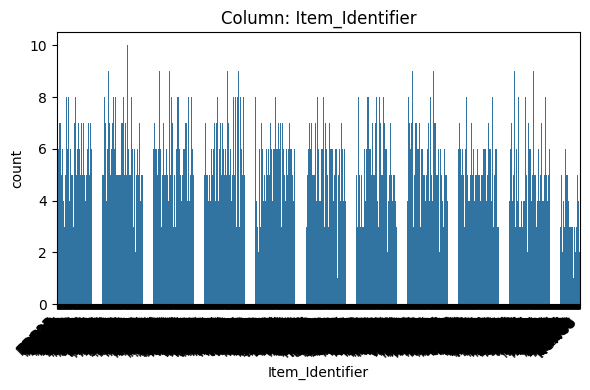

- NaN's Found: 0 (0.0%)
- Unique Values: 1559
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Item_Identifier'}, xlabel='Item_Identifier', ylabel='count'>)

In [ ]:
explore_categorical(df,"Item_Identifier")

#Feature Observations



1.   What type of feature is it? (Categorical (nominal), ordinal, numeric)



-      categorical (nominal)




2.   How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)



- No nun's


3. Is the feature constant or quasi-constant?



- No

4.What is the cardinality? Is it high?

- 1559 ,Yes it is high

5.Would we know this BEFORE the target is determined?

- Yes

6.
Is there a business case/understanding reason to exclude based on our business case?

- Yes

In [ ]:
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace({"LF":"Low Fat","reg":"Regular","low fat":"Low Fat"})

#inspecting: "Item_Fat_Content"

<ipython-input-69-86d7600a77c0>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


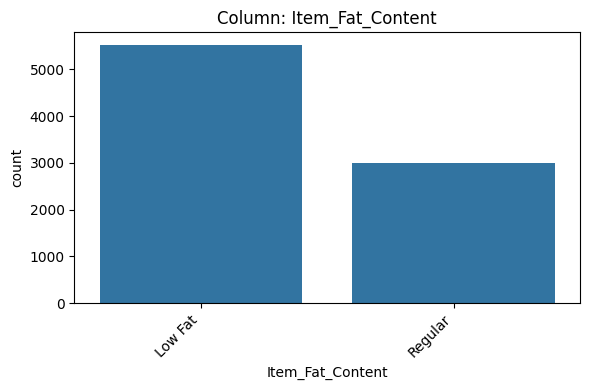

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Item_Fat_Content'}, xlabel='Item_Fat_Content', ylabel='count'>)

In [ ]:
explore_categorical(df,"Item_Fat_Content")

#answer questions for inspection

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

- categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

- there is no null values

3. Is the feature constant or quasi-constant?

- since perc_most_common <98 =(64.73%) it is not constant column

4. What is the cardinality? Is it high (>10)?

- 2 it is low

5. Would we know this feature before the target is determined?

- yes

6. Is there a business case/understanding reason to exclude based on our business case?

- Possibly, it may not be possible for a storeowner to modify the item_fat_content available.

# inspecting:"Item_Type"

<ipython-input-69-86d7600a77c0>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


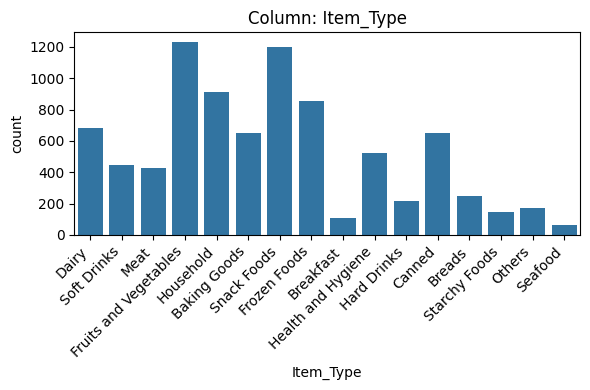

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Item_Type'}, xlabel='Item_Type', ylabel='count'>)

In [ ]:
explore_categorical(df,"Item_Type")

#feature observation

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

- it is categoricl

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

- there is no nun values

3. Is the feature constant or quasi-constant?

- it is not constant

4. What is the cardinality? Is it high (>10)?

- high cardinality since unique values>10

5. Would we know this feature before the target is determined?

- Yes

6.
Is there a business case/understanding reason to exclude based on our business case?

- it maybe possible for storeowner to control item_type available

#inspecting:"Outlet_Identifier"

<ipython-input-69-86d7600a77c0>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


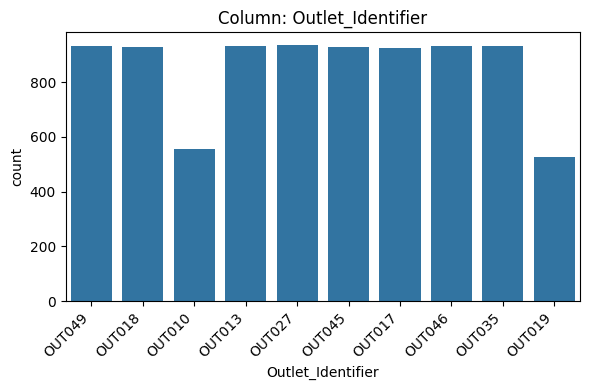

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Identifier'}, xlabel='Outlet_Identifier', ylabel='count'>)

In [ ]:
explore_categorical(df,"Outlet_Identifier")

#Feature Observations

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

- Categorical.
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

- No nun's

3. Is the feature constant or quasi-constant?

- No.
4. What is the cardinality? Is it high?

- high cardinality since unique values=10
5. Would we know this BEFORE the target is determined?

- Yes.
6. Is there a business case/understanding reason to exclude based on our business case?

-  it maybe possible for storeowner to control  outlet_identifer


#inspecting:"Outlet_Size"

<ipython-input-69-86d7600a77c0>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


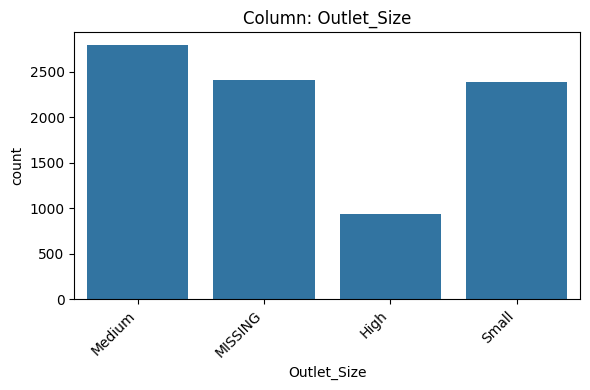

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Size'}, xlabel='Outlet_Size', ylabel='count'>)

In [ ]:
explore_categorical(df,"Outlet_Size")

#Feature Observations
1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Categorical.
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
- there is nun values=(2410)(28.28%)
3. Is the feature constant or quasi-constant?
- No.
4. What is the cardinality? Is it high?
- low cardinality since unique values=4
5. Would we know this BEFORE the target is determined?
- Yes.
6. Is there a business case/understanding reason to exclude based on our business case?
- it maybe not possible for storeowner to control outlet_size

#inspecting:"Outlet_Location_Type"

<ipython-input-69-86d7600a77c0>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


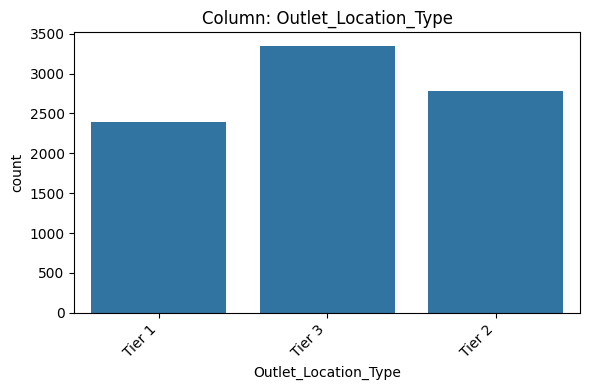

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Location_Type'}, xlabel='Outlet_Location_Type', ylabel='count'>)

In [ ]:
explore_categorical(df,"Outlet_Location_Type")

#Feature Observations
1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Categorical.
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
- No nun's
3. Is the feature constant or quasi-constant?
- No.
4. What is the cardinality? Is it high?
- low cardinality since unique values=3
5. Would we know this BEFORE the target is determined?
- Yes.
6. Is there a business case/understanding reason to exclude based on our business case?
- it maybe possible for storeowner to control outlet_location_type

#inspecting"'Outlet_Type"

<ipython-input-69-86d7600a77c0>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


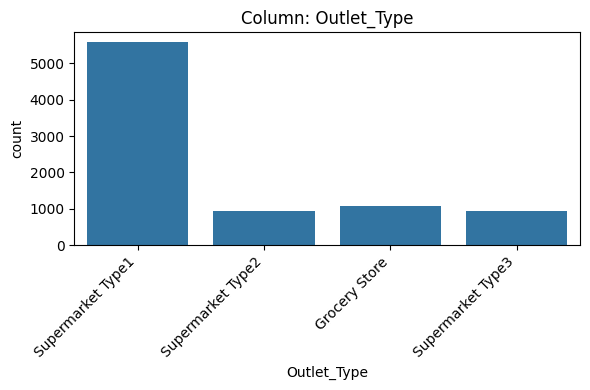

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Type'}, xlabel='Outlet_Type', ylabel='count'>)

In [ ]:
explore_categorical(df,"Outlet_Type")

#Feature Observations
1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Categorical.
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
- No nun's
3. Is the feature constant or quasi-constant?
- No.
4. What is the cardinality? Is it high?
- low cardinality since unique values=4
5. Would we know this BEFORE the target is determined
- Yes. i would know this before target determined
6. Is there a business case/understanding reason to exclude based on our business case?
- it maybe possible for storeowner to control outlet_location_type

# **inspecting in numeric features**

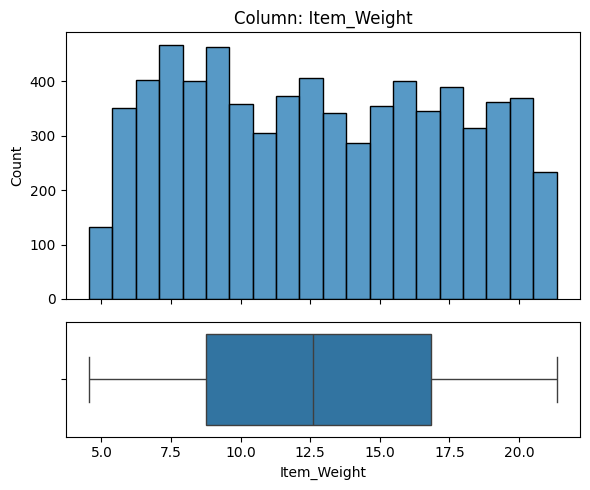

- NaN's Found: 1463 (17.17%)


In [ ]:
explore_numeric(df,"Item_Weight" )

#Feature Observations

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

- numeric.
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

- No nun's

3. Is the feature constant or quasi-constant?

- No.
4. What is the cardinality? Is it high?

Not applicable (numeric).
5. Would we know this BEFORE the target is determined?

- Yes.
6. Is there a business case/understanding reason to exclude based on our business case?

- No.


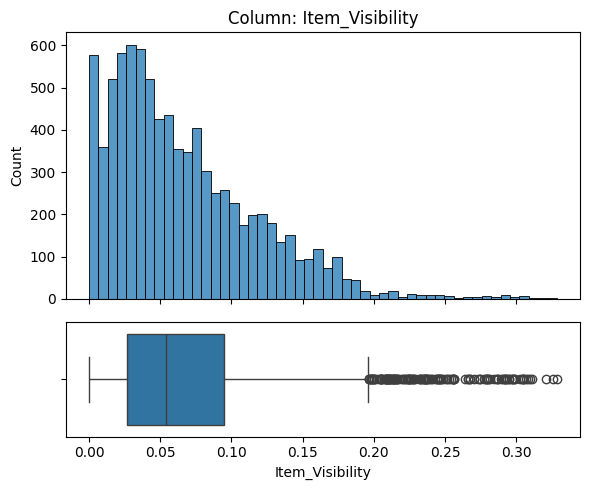

- NaN's Found: 0 (0.0%)


In [ ]:
explore_numeric(df,"Item_Visibility" )

#Feature Observations
1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
- numeric.
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
- No nun's
3. Is the feature constant or quasi-constant?
- No.
4. What is the cardinality? Is it high?
- Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
- Yes.
6. Is there a business case/understanding reason to exclude based on our business case?
- No.

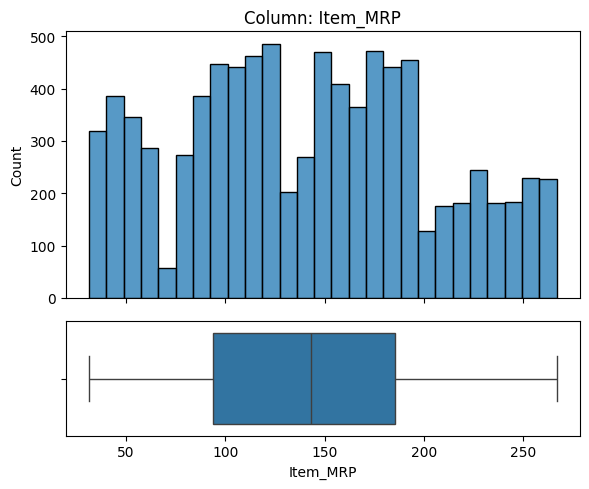

- NaN's Found: 0 (0.0%)


In [ ]:
explore_numeric(df,"Item_MRP" )

#Feature Observations
1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
- numeric.
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
- No nun's
3. Is the feature constant or quasi-constant?
- No.
4. What is the cardinality? Is it high?
- Not applicable (numeric).
5. Would we know this BEFORE the target is determined?
- Yes.
6. Is there a business case/understanding reason to exclude based on our business case?
- No.

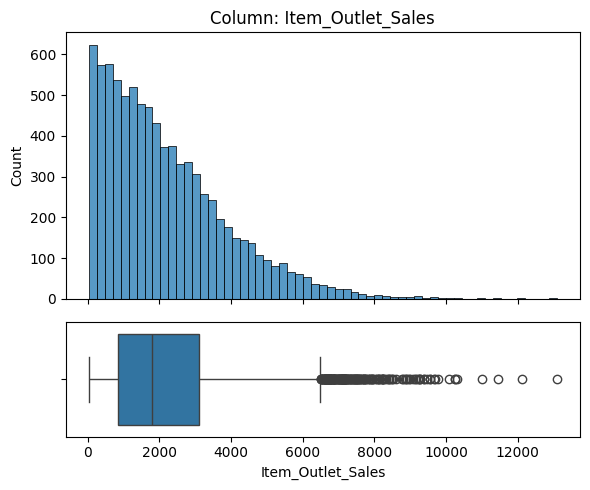

- NaN's Found: 0 (0.0%)


In [ ]:
explore_numeric(df,"Item_Outlet_Sales" )

#Feature Observations

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

- numeric. our target!
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

- 0
3. Is the feature constant or quasi-constant?

- Not a feature!
4. What is the cardinality? Is it high?

 -  numeric.
5. Would we know this BEFORE the target is determined?

- Yes, since it  our target!
6. Is there a business case/understanding reason to exclude based on our business case?

- Yes, its our target!

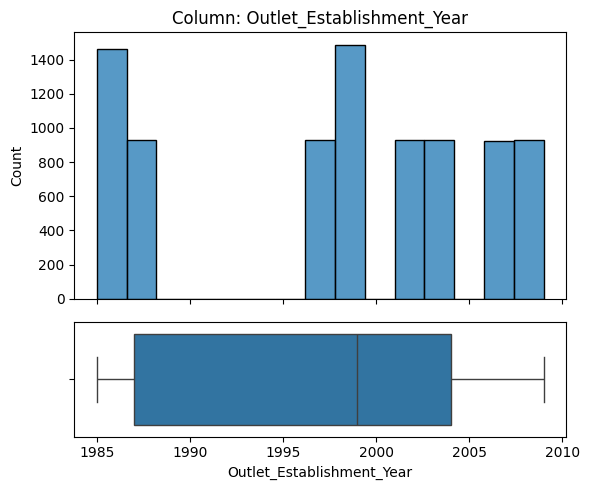

- NaN's Found: 0 (0.0%)


In [ ]:
explore_numeric(df,"Outlet_Establishment_Year" )

In [ ]:
df['Outlet_Establishment_Year'].describe()

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

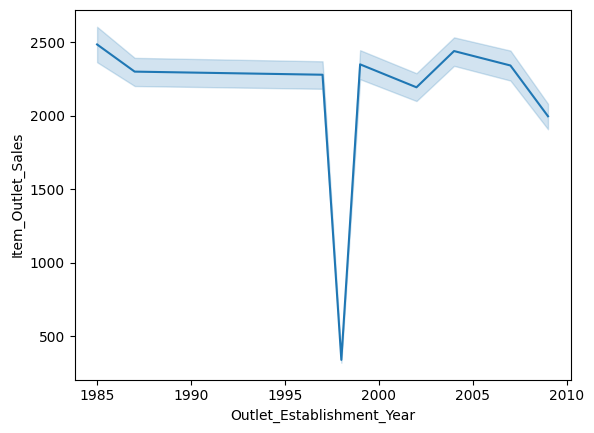

In [ ]:
ax=sns.lineplot(data=df,x="Outlet_Establishment_Year",y="Item_Outlet_Sales")

- i observe sever low in sales during 1995-2000 years
- yes i would know that  

#Create a multivariate visualization plotting each feature vs. the target.

In [ ]:
def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax


In [ ]:
def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4), **kwargs): # kwargs for sns.regplot
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs) # Included the new argument within the sns.regplot function
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})")
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax

In [ ]:
cat_cols=df.select_dtypes("object").columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
num_cols=df.select_dtypes("number").columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

##inspecting:"Item_Fat_Content vs "Item_Outlet_Sales"

<ipython-input-86-f845cf69dd26>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Fat_Content vs. Item_Outlet_Sales'}, xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>)

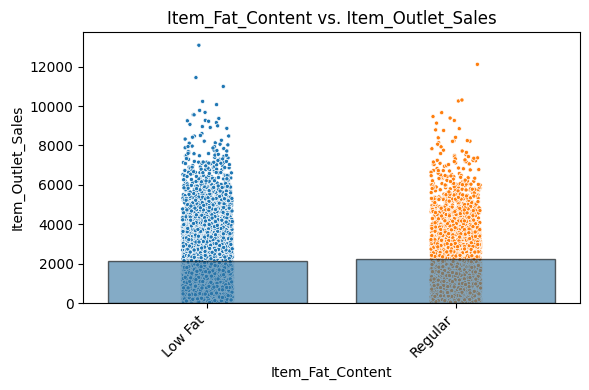

In [ ]:
plot_categorical_vs_target(df,"Item_Fat_Content")

# Feature observation :
1. Based on your business understanding, would you expect this feature to be a predictor of the target?
- Yes, I would expect that a product with low fat would have a higher sales than those with regular
2. Does this feature appear to be a predictor of the target?
- no, the range sales for both are same approximatelly

<ipython-input-86-f845cf69dd26>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Type vs. Item_Outlet_Sales'}, xlabel='Item_Type', ylabel='Item_Outlet_Sales'>)

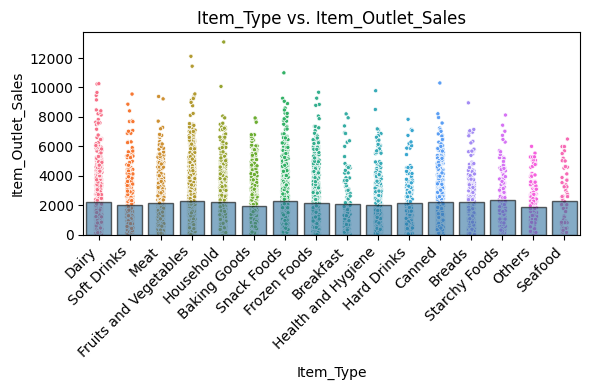

In [ ]:
plot_categorical_vs_target(df,"Item_Type")

#Feature observation :
1. Based on your business understanding, would you expect this feature to be a predictor of the target?
- Yes, I would expect that (Frutis and Vegetables)&(Snack Food) would have a higher sales than others
2. Does this feature appear to be a predictor of the target?
- yes,since alot of types had high avarage sales than others

<ipython-input-86-f845cf69dd26>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Identifier vs. Item_Outlet_Sales'}, xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>)

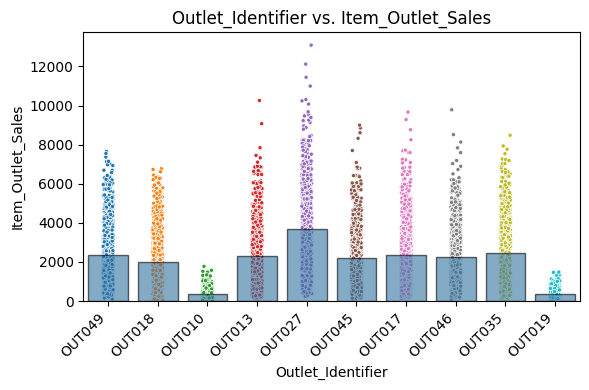

In [ ]:
plot_categorical_vs_target(df,"Outlet_Identifier")

#Feature observation :
1. Based on your business understanding, would you expect this feature to be a predictor of the target?
- Yes, I would expect that OUT10 & OUT19 had lowest sales avarage but OUT 27 had highest avarage sales
2. Does this feature appear to be a predictor of the target?
- yes,it would be a pridictor for our target

<ipython-input-86-f845cf69dd26>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Size vs. Item_Outlet_Sales'}, xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>)

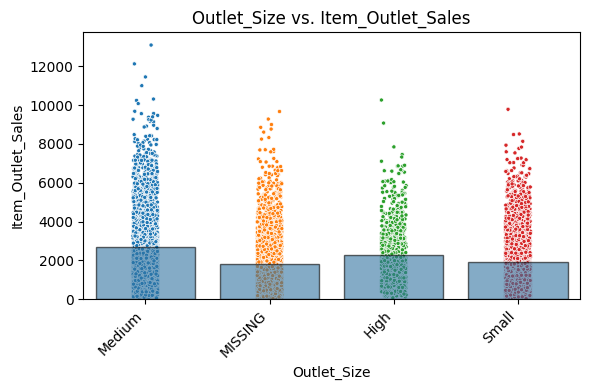

In [ ]:
plot_categorical_vs_target(df,"Outlet_Size")

#Feature observation :
1. Based on your business understanding, would you expect this feature to be a predictor of the target?
- Yes, I would expect that medium store has the highest sales avarage but also high and small outlet_size had high avarage
2. Does this feature appear to be a predictor of the target?
- yes,i think it would be aperdictor for target feature

<ipython-input-86-f845cf69dd26>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Location_Type vs. Item_Outlet_Sales'}, xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>)

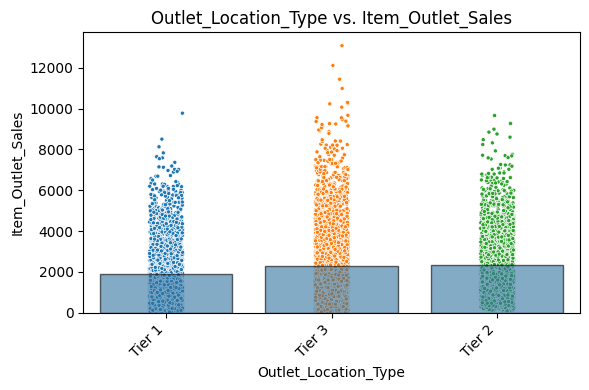

In [ ]:
plot_categorical_vs_target(df,"Outlet_Location_Type")

#Feature observation :
1. Based on your business understanding, would you expect this feature to be a predictor of the target?
- Yes, I would expect that Tier 3 has the higest sales
2. Does this feature appear to be a predictor of the target?
- No, there are very few examples in tier3 above tier2 and tier 1

<ipython-input-86-f845cf69dd26>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Type vs. Item_Outlet_Sales'}, xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>)

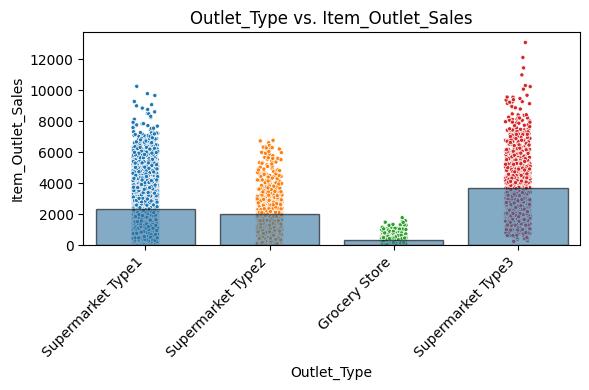

In [ ]:
plot_categorical_vs_target(df,"Outlet_Type")

#Feature observation :
1. Based on your business understanding, would you expect this feature to be a predictor of the target?
- i would expect supermarket type 1 has the hiest avarage on sales but type3 was the higest
2. Does this feature appear to be a predictor of the target?
- yes i think it would be a predictor for our target

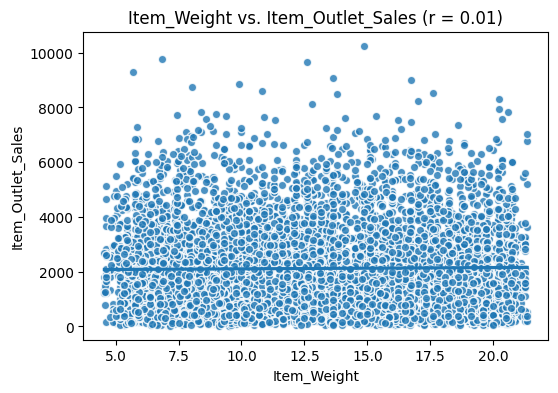

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Weight vs. Item_Outlet_Sales (r = 0.01)'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>)

In [ ]:
plot_numeric_vs_target(df,"Item_Weight")

#Feature observation :
1. Based on your business understanding, would you expect this feature to be a predictor of the target?
- NO, people sales are same ignoring item_weight
2. Does this feature appear to be a predictor of the target?
-  No,

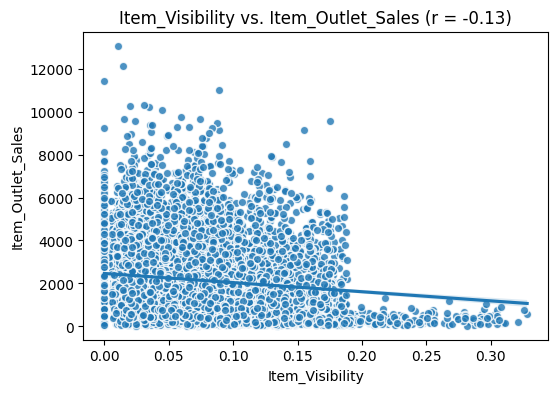

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Visibility vs. Item_Outlet_Sales (r = -0.13)'}, xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>)

In [ ]:
plot_numeric_vs_target(df,"Item_Visibility")

#Feature observation :
1. Based on your business understanding, would you expect this feature to be a predictor of the target?
- Yes,i think when item_visibility increased sales would be increased in parallel
2. Does this feature appear to be a predictor of the target?
Yes, but in opposite direction

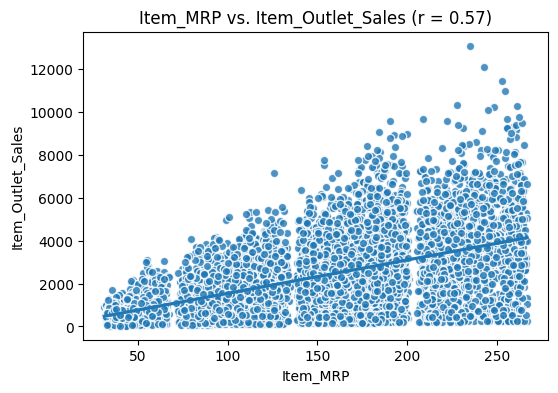

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_MRP vs. Item_Outlet_Sales (r = 0.57)'}, xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>)

In [ ]:
plot_numeric_vs_target(df,"Item_MRP")

#Feature observation :
1. Based on your business understanding, would you expect this feature to be a predictor of the target?
- Yes, i think when MPR increased sales would be decreased
2. Does this feature appear to be a predictor of the target?
- Yes, but in opposite direction